# Temporal HIErarchical Forecasting with R

The idea is to take a seasonal time series, and compute all possible temporal aggregations that result in an integer number of observations per year. For example, a quarterly time series is aggregated to biannual and annual; while a monthly time series is aggregated to 2-monthly, quarterly, 4-monthly, biannual and annual. Each of the resulting time series are forecast, and then the forecasts are reconciled using the hierarchical reconciliation algorithm.

Steps:

1) Load Libraries

2) Load CSV and Convert to TS

3) Split TS into Train and Test

4) Forecast with THIEF 44 values 

5) Calculate MAE and MAPE

6) Plot the Data

More on - https://robjhyndman.com/hyndsight/thief/

# Load Libraries

In [104]:
options(warn=-1)
library(thief)
library(forecast)
library(ggplot2)
library(xts)
library(zoo)
library(RCurl)

# Load CSV and Convert to TS

In [105]:
myurl <- getURL("https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/Monthly%20Production%20of%20Chocolate%20-%20Australia.csv")
myurl_content <- read.csv(text = myurl, stringsAsFactors = FALSE)
myurl_content$Month <- as.Date(as.yearmon(myurl_content$Month), frac = 1)
tail(myurl_content)

,Month,Volume
453,1995-03-31,9875
454,1995-04-30,6495
455,1995-05-31,8668
456,1995-06-30,9685
457,1995-07-31,10109
458,1995-08-31,11095


In [106]:
choco_xts <- as.xts(myurl_content$Volume, order.by=myurl_content$Month) 

# Split TS into Train and Test

In [107]:
choco_train <- choco_xts[index(choco_xts) < "1992-01-01"]
choco_test <- choco_xts[index(choco_xts) >= "1992-01-01"]

In [108]:
head(choco_test)

           [,1]
1992-01-31 4534
1992-02-29 7356
1992-03-31 8709
1992-04-30 8191
1992-05-31 8279
1992-06-30 8064

In [109]:
choco_train_ts <- ts(choco_train,start = c(1957,7),frequency = 12)
choco_test_ts <- ts(choco_test,start = c(1992,1),frequency = 12)
tail(choco_train_ts)

       Jul   Aug   Sep   Oct   Nov   Dec
1991  8093 10045  7881  8409  8162  8086

# Forecast with THIEF 44 values 

In [110]:
fc <- thief(choco_train_ts, h=44)

In [111]:
fc$mean

           Jan       Feb       Mar       Apr       May       Jun       Jul
1992  3869.688  8493.985  9386.156  7929.874  8958.270  8408.191  8709.298
1993  3959.772  8681.520  9590.743  8107.630  9146.753  8584.822  8890.174
1994  4049.853  8869.116  9795.399  8285.439  9335.295  8761.506  9071.105
1995  4139.932  9056.774 10000.124  8463.300  9523.896  8938.241  9252.089
           Aug       Sep       Oct       Nov       Dec
1992  9593.966  8289.292  9060.242  8507.524  7387.255
1993  9793.016  8465.820  9250.583  8686.661  7542.845
1994  9992.132  8642.399  9440.985  8865.853  7698.475
1995 10191.314                                        

# Calculate MAE and MAPE

In [112]:
# Calculate the MAE
MAE <- mean(abs(fc$mean - choco_test_ts))

# Calculate the MAPE
MAPE <- 100*mean(abs(fc$mean - choco_test_ts)/choco_test_ts)

# Print to see how good your forecast is!
print(MAE)
print(MAPE)

[1] 843.3156
[1] 9.949051


# Plot the Data

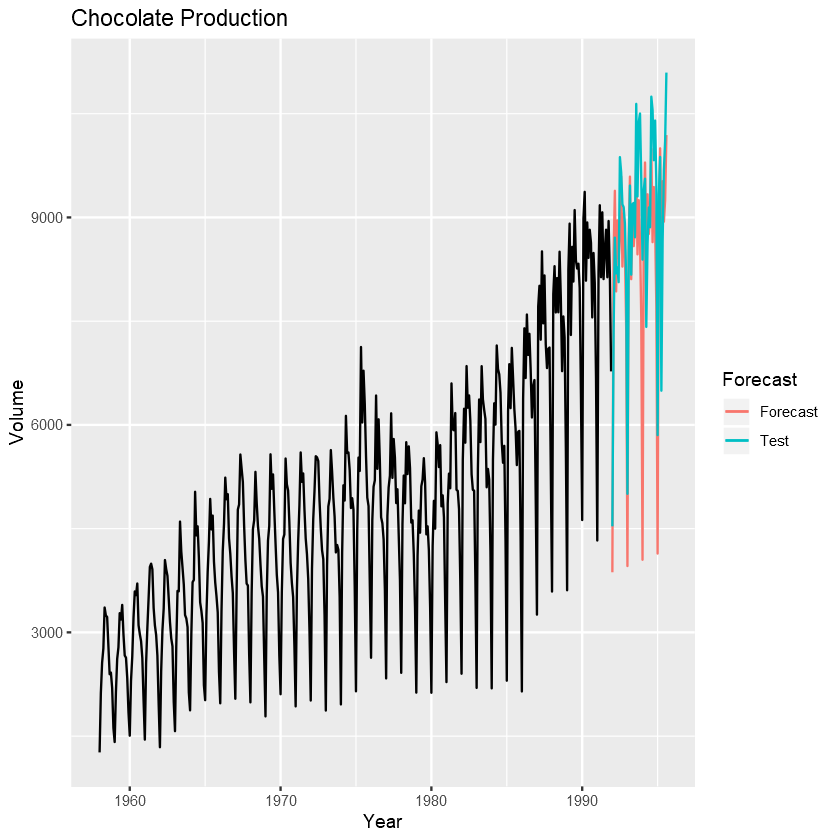

In [113]:
autoplot(fc$fitted)  +
  autolayer(fc$mean, series="Forecast", PI=FALSE)+
  autolayer(choco_test_ts, series="Test", PI=FALSE)+
  xlab("Year") + ylab("Volume") +
  ggtitle("Chocolate Production") +
  guides(colour=guide_legend(title="Forecast"))